# AutoRegressive Integrated Moving Average (ARIMA) model
ARIMA is one of the time series forecasting models. It is a general class of models that includes different varieties.
### STEPS
There are follwing steps for ARIMA forecasting : 
1. Visualize the Time Series Data
2. Identify if the date is stationary , if data is stationary go to 3rd step otherwise perform differencing on data to make sationary.
3. Plot the Correlation and Auto Correlation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data (Here we will do only arima model).
#### A standard notation is used of ARIMA(p,d,q) .
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
# reading  melborne daily temperature data
data = pd.read_csv("daily_melborne_temperatures.csv",index_col = 'Date')
data.index = pd.to_datetime(data.index)
print("The shape of the data :",data.shape)
data.head()

The shape of the data : (3650, 1)


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [5]:
# trian and test set
train = data[:round(len(data) * 0.9)]
test = data[round(len(data) * 0.9):]
print(f"Shape of train data : {train.shape}")
print(f"Shape of test data : {test.shape}")

Shape of train data : (3285, 1)
Shape of test data : (365, 1)


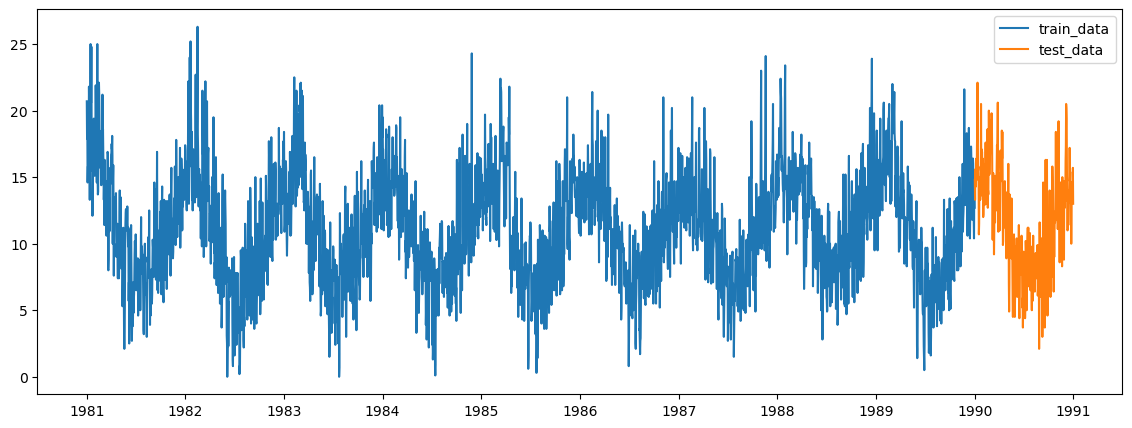

In [6]:
# univarite time series plot

plt.figure(figsize = (14,5))
plt.plot(train, label = 'train_data')
plt.plot(test,label = 'test_data')
plt.legend();

## Stationary Test
- The observations in a stationary time series are not dependent on time.

In [7]:
# lets check for stationrity test for this we use adfuller test
from statsmodels.tsa.stattools import adfuller
def ADFTest(series):
    x = adfuller(series.values)
    print('ADF Statistic: %f' % x[0])
    print('p-value: %f' % x[1])
    if x[1] <= 0.05:
        print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
    else :
        print("Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.")

In [8]:
ADFTest(data)

ADF Statistic: -4.444805
p-value: 0.000247
Reject the null hypothesis (H0), the data does not have a unit root and is stationary


### acf and pacf plots

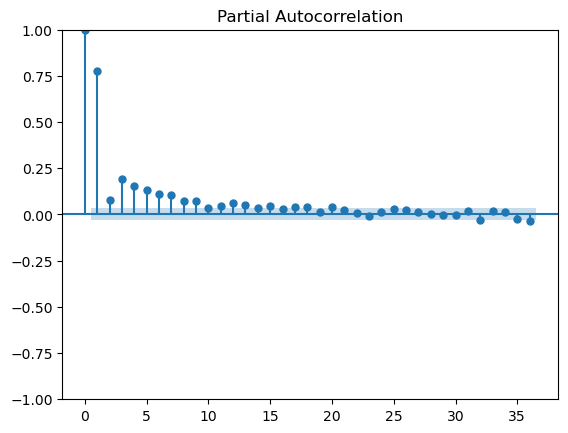

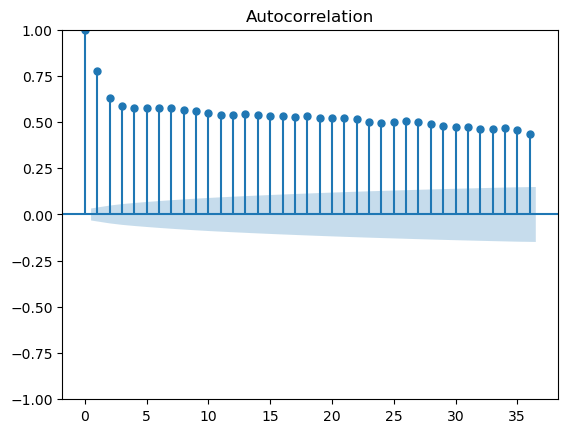

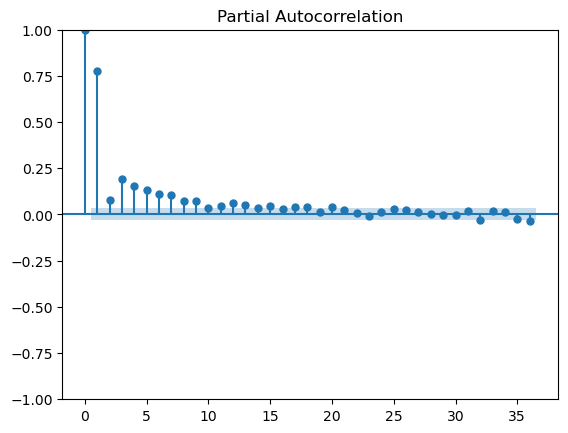

In [9]:
# acf and pacf for finding values of p and q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plot_pacf(data)

In [10]:
# here q = 1 , p = 3
# arima model --> ARIMA(3,0,1)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(3,0,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

C:\Users\Shubham Soni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shubham Soni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shubham Soni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3285
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -7566.026
Date:                Tue, 28 Mar 2023   AIC                          15144.051
Time:                        03:35:11   BIC                          15180.634
Sample:                             0   HQIC                         15157.149
                               - 3285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4366      0.841     13.607      0.000       9.789      13.084
ar.L1          1.4834      0.019     76.172      0.000       1.445       1.522
ar.L2         -0.6135      0.028    -21.880      0.0

### prediction on train data

<AxesSubplot:xlabel='Date'>

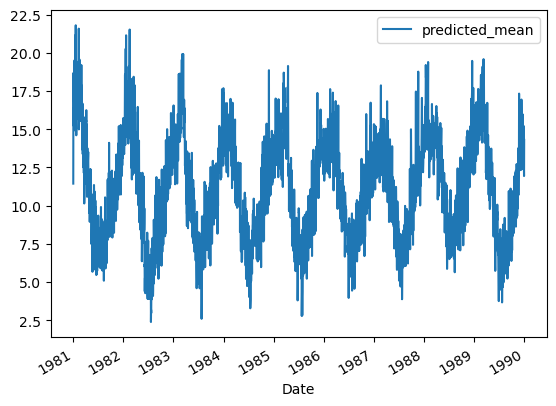

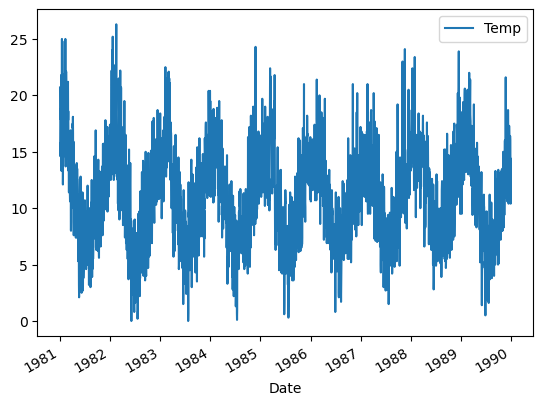

In [11]:
# forecasting on test data
forecast = model_fit.predict(n_periods=len(train))
forecast = pd.DataFrame(forecast)
forecast.index = train.index
forecast.plot()
train.plot()

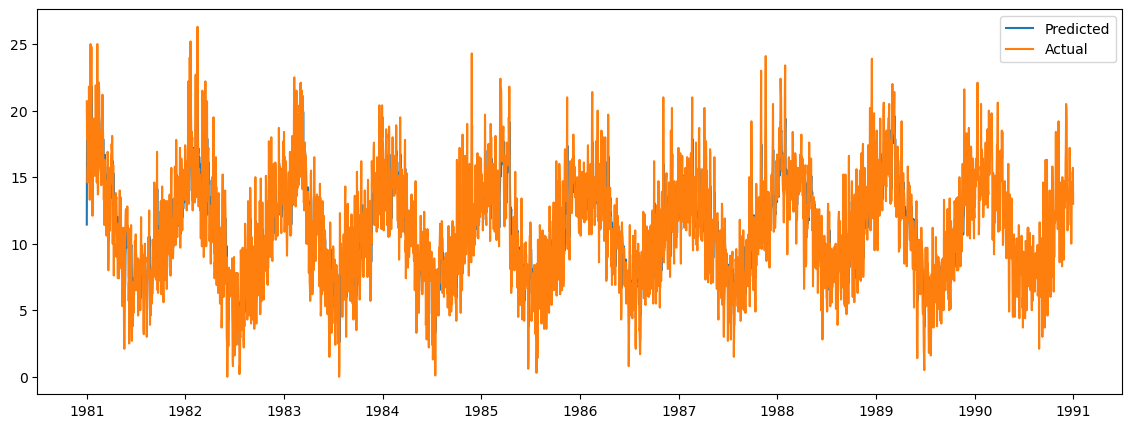

In [12]:
predict=model_fit.predict(typ='levels')
plt.figure(figsize = (14,5))
plt.plot(predict, label = 'Predicted')
plt.plot(data.iloc[:,-1],label = 'Actual')
plt.legend()

### prediction on test data

C:\Users\Shubham Soni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


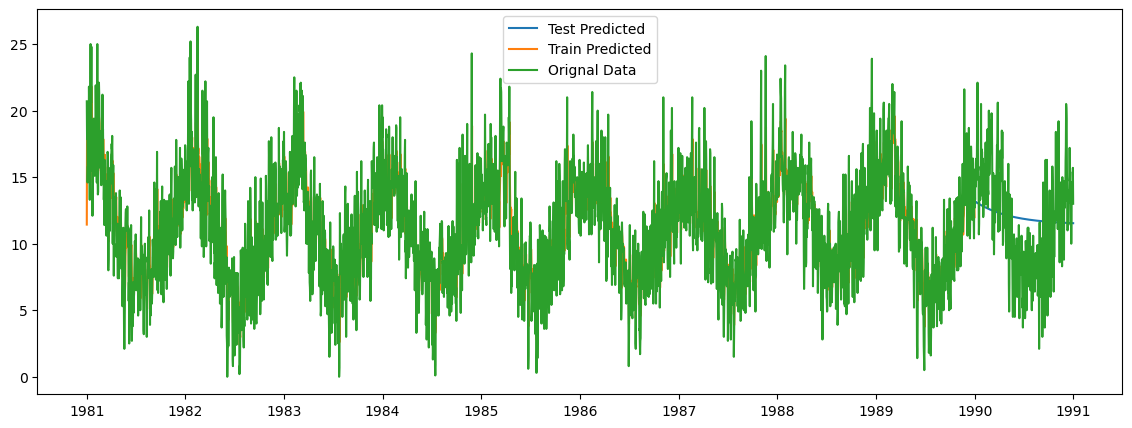

In [16]:
forecast_test = model_fit.forecast(len(test))
forecast_test = pd.DataFrame(forecast_test)
forecast_test.index = test.index
plt.figure(figsize = (14,5))
plt.plot(forecast_test, label = 'Test Predicted')
plt.plot(predict, label = 'Train Predicted')
plt.plot(data, label = 'Orignal Data')
plt.legend();

### Accuracy Measurement
Root mean squre (rms) commonly used to accuracy metrics to judge forecasts.

In [14]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast_test))
print("The root square mean error :",rms)
print("The mean value of  the data: ",data.mean())

The root square mean error : 3.6939369895237544
The mean value of  the data:  Temp    11.177753
dtype: float64
